In [1]:
import pandas as pd
import numpy as np
import lasio

las = lasio.read(r'../../../data_well_log/las_files_Lithostrat_data/7_1-1.las')
df = las.df()
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 17982 entries, 82.600799561 to 2815.7127996
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  16241 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   16242 non-null  float64
 2   CALI                               16270 non-null  float64
 3   BS                                 17947 non-null  float64
 4   DCAL                               16272 non-null  float64
 5   MUDWEIGHT                          15724 non-null  float64
 6   ROP                                17343 non-null  float64
 7   RDEP                               16121 non-null  float64
 8   RSHA                               16115 non-null  float64
 9   RMED                               16152 non-null  float64
 10  SP                                 16151 non-null  float64
 11  DTC                               

In [2]:
las = lasio.read(r'../../../data_well_log/las_files_Lithostrat_data/35_4-1.las')
df = las.df()
df.columns

Index(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'CALI', 'BS', 'ROP', 'RDEP', 'RMED', 'DTS', 'DTC', 'NPHI', 'PEF', 'GR',
       'RHOB', 'DRHO', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC'],
      dtype='object')

In [3]:
log_curves = ['CALI', 'BS', 'DCAL', 'ROP', 'RDEP', 'RSHA', 'RMED', 'SP', 'DTS', 'DTC', 'NPHI', 'GR', 'RHOB', 'DRHO']

for curve in log_curves:
    if curve not in df.columns:
        df[curve] = 0

X = df.fillna(0)
X = X[log_curves]
X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X = X.fillna(0)


In [4]:
# Reshape the DataFrame - 3D tensor
from PIL import Image

D = len(X.index.values)
N = len(X.columns)
data = X.to_numpy()
# '1' represents the number of channels (each feature is treated as a separate channel)
input_tensor = np.reshape(data, (D, N, 1)) 


In [5]:
# Rescale the input tensor values to the range [0, 255] for image representation
input_tensor = (input_tensor * 255).astype(np.uint8)

# Convert the input tensor to PIL image
input_image = Image.fromarray(input_tensor[:, :, 0], mode='L')

# Save the input image
input_image.save('1d_image_3.png')

In [6]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11,
                 12345: 12}

labels = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].fillna(12345).astype(int)
y = pd.concat([X, labels], axis=1)
y

,CALI,BS,DCAL,ROP,RDEP,RSHA,RMED,SP,DTS,DTC,NPHI,GR,RHOB,DRHO,FORCE_2020_LITHOFACIES_LITHOLOGY
DEPT,,,,,,,,,,,,,,,
403.604,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.685957,12345
403.756,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.897596,0.000000,0.0,0.685957,12345
403.908,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857792,0.000000,0.0,0.685957,12345
404.060,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.791115,0.000000,0.0,0.685957,12345
404.212,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.817098,0.000000,0.0,0.685957,12345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957.828,0.0,0.236111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.382298,0.0,0.685957,12345
4957.980,0.0,0.236111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.384776,0.0,0.685957,12345
4958.132,0.0,0.236111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.377819,0.0,0.685957,12345


In [7]:
labels = y['FORCE_2020_LITHOFACIES_LITHOLOGY']
labels = labels.replace(lithology_numbers)

In [8]:
DL = len(y.index)
NL = len(y.columns) - 1  # Exclude the label column
C = 13
label_tensor = np.zeros((DL, NL, 13))
print(label_tensor.shape)
for i, row in enumerate(label_tensor):
    for j, val in enumerate(row):
        class_label = labels.iloc[i]
        label_tensor[i, j, class_label] = 1

(29967, 14, 13)


In [9]:
print(input_tensor.shape)
print(label_tensor.shape)
print("Minimum value:", np.min(label_tensor))
print("Maximum value:", np.max(label_tensor))
print("Average value:", np.mean(label_tensor))


(29967, 14, 1)
(29967, 14, 13)
Minimum value: 0.0
Maximum value: 1.0
Average value: 0.07692307692307693


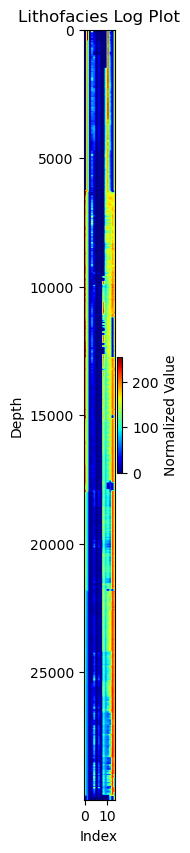

In [15]:
import matplotlib.pyplot as plt

# Create the lithofacies log plot
fig = plt.figure(figsize=(0.5, 10))
plt.imshow(input_tensor, cmap='jet', aspect='auto')

# Set the labels and title
plt.xlabel('Index')
plt.ylabel('Depth')
plt.title('Lithofacies Log Plot')

# Show the colorbar
plt.colorbar(label='Normalized Value')

# Show the plot
plt.show()

In [10]:
from PIL import Image

scaled_label_tensor = (label_tensor[:, :, 0] * 255).astype(np.uint8)

# Convert the tensor to PIL image
label_image = Image.fromarray(scaled_label_tensor, mode='L')

# Save the label image
label_image.save('label_img2.png')

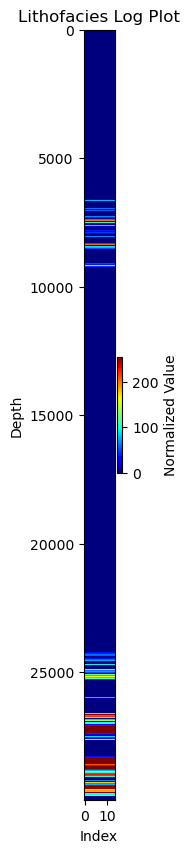

In [14]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Create the lithofacies log plot
fig = plt.figure(figsize=(0.5, 10))
plt.imshow(scaled_label_tensor, cmap='jet', aspect='auto')

# Set the labels and title
plt.xlabel('Index')
plt.ylabel('Depth')
plt.title('Lithofacies Log Plot')

# Show the colorbar
plt.colorbar(label='Normalized Value')

# Show the plot
plt.show()